<a href="https://colab.research.google.com/github/vin136/NN-foundations/blob/main/nn_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 1. function and it's derivative
def f(x):
  return 3*(x**2) + 2


In [3]:
f(2)

14

In [6]:
inputs_ = np.arange(-5,5,0.5)
inputs_

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [8]:
y = f(inputs_)
y

array([77.  , 62.75, 50.  , 38.75, 29.  , 20.75, 14.  ,  8.75,  5.  ,
        2.75,  2.  ,  2.75,  5.  ,  8.75, 14.  , 20.75, 29.  , 38.75,
       50.  , 62.75])

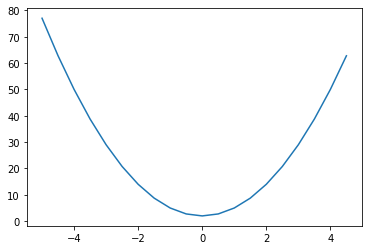

In [11]:
plt.plot(inputs_,y)

In [12]:
# derivative at a point dy/dx at x = 2
x = 2
h = 0.00001
(f(x+h)-f(x))/h

#verify this manually 6*x at (x= 2)

12.000030000081095

In [14]:

a = 2
b = 3

#derivative of arbitrary mathematical expressions

c = a*b + 1

#whats dc/da => when i nudge a by little bit what's the effect on c
#let's numerically derive it

h = 0.00001

(((a+h)*b + 1) - (a*b+1))/h

d = c + b
L = d**2

# we can calculate dL/dd,dd/dc similarly.

2. [Chain rule of calculus](https://en.wikipedia.org/wiki/Chain_rule)

question: Can we automatically calculate these derivatives of arbitrary mathematical expressions ?

In [ ]:
#let's practice this

a = 2
b = 3

c = a*b

d = c + 3

#what's dd/da ?
# dd/da = (dd/dc)(dc/da) = 1*b = 3



In [25]:
# pass 1
class Variable:
  def __init__(self,data):
    self.data = data

  def __repr__(self):
    return f"Variable({self.data})"

  def __add__(self,other):
    return Variable(self.data+other.data)

  



In [26]:
a = Variable(3)
b = Variable(5)

c = a + b

c

Variable(8)

In [27]:
d = a+2

AttributeError: ignored

In [28]:
# pass 1
class Variable:
  def __init__(self,data):
    self.data = data

  def __repr__(self):
    return f"Variable({self.data})"

  def __add__(self,other):
    #if other is not of Variable type, we'll cast it so
    other = Variable(other) if isinstance(other,(int,float)) else other
    return Variable(self.data+other.data)

  

  



In [29]:
a = Variable(3)
b = Variable(5)
d = a+2

In [30]:
d

Variable(5)

In [31]:
2+a

TypeError: ignored

In [21]:
# pass 1
class Variable:
  def __init__(self,data):
    self.data = data

  def __repr__(self):
    return f"Variable({self.data})"

  def __add__(self,other):
    #if other is not of Variable type, we'll cast it so
    other = other if isinstance(other,Variable) else Variable(other)
    return Variable(self.data+other.data)

  def __radd__(self,other):
    return self + other

  

  



In [23]:
a = Variable(3)
b = Variable(5)

2+a

Variable(5)

In [32]:
#let's just add support for other operations

# pass 1
class Variable:
  def __init__(self,data):
    self.data = data

  def __repr__(self):
    return f"Variable({self.data})"

  def __add__(self,other):
    #if other is not of Variable type, we'll cast it so
    other = other if isinstance(other,Variable) else Variable(other)
    return Variable(self.data+other.data)

  def __radd__(self,other):
    return self + other

  def __mul__(self,other):
    other = other if isinstance(other,Variable) else Variable(other)
    return Variable(self.data*other.data)

  def __rmul__(self,other):
    return self*other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  

  




1. [radd](https://www.reddit.com/r/learnpython/comments/3cvgpi/can_someone_explain_radd_to_me_in_simple_terms_i/)

In [33]:
# what do i want now ?
a = Variable(3)
b = Variable(5)

c = a + b

d = 2*c 

L = c+d

#when i evaluate this set i would want to automatically get all the derivaties: dL/dc,dL/da,dL/db.


In [34]:
L

Variable(36)

In [37]:
#let's get dL/da: go back to the definition

#1
a = Variable(3)
b = Variable(5)



c = a + b

L = 2*c 



#2nudge a little bet and see the effect
a = Variable(3)
b = Variable(5)


h  = 0.00001
a += h


c = a + b

Lh = 2*c 




(Lh-L)/h


Variable(1.9999999999242843)

In [38]:
#dL/da = (dL/dc)*dc/da = 2*1 => so chain rule kind of works. Can we implement this ?

In [ ]:
a = Variable(3)
b = Variable(5)



c = a + b

In [110]:
# it's good that we are tracking the outputs for expressions. But we also want to be able to take the dc/da. Let's keep track of it.

# pass 2 ( we got to keep track of more state)


#let's just add support for other operations

# pass 1
class Variable:
  def __init__(self,data,_children = (),_op= '',label = ''):
    self.data = data

    self.grad = 0
    self._op = _op
    self.label = label
    self._children = set(_children)

  def __repr__(self):
    return f"Variable({self.data})"

  def __add__(self,other):
    #if other is not of Variable type, we'll cast it so
    other = other if isinstance(other,Variable) else Variable(other)
    return Variable(self.data+other.data,(other,self),'+')

  def __radd__(self,other):
    return self + other

  def __mul__(self,other):
    other = other if isinstance(other,Variable) else Variable(other)
    return Variable(self.data*other.data,(other,self),'*')

  def __rmul__(self,other):
    return self*other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  




In [111]:
a = Variable(3)
b = Variable(5)
c = 4*a + 3*b

L = 2*c 

In [92]:
a._children

set()

In [93]:
c._children,L._children

({Variable(12), Variable(15)}, {Variable(12), Variable(54)})

In [96]:
# we'll evaluate right to left.
#base case = dL/dL = 1
L.grad = 1

#dL/dc = dL/dL* dL/dc
c.grad = L.grad*(2)

#chain-rule kicks in
#dL/da = dL/dL* dL/dc * dc/da
a.grad = L.grad*c.grad*(4)

b.grad = L.grad*c.grad*(3)





In [94]:
#sanity check

a = Variable(3)
b = Variable(5)
c = 4*a + 3*b

L = 2*c 


h = 0.00001
a = Variable(3) + h
b = Variable(5)
c = 4*a + 3*b

Lh = 2*c 


(Lh-L)/h

Variable(7.999999999697137)

In [97]:
a.grad

8

## Aside : Visualize our computation graph

In [158]:
#to visualize your graph
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._children:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

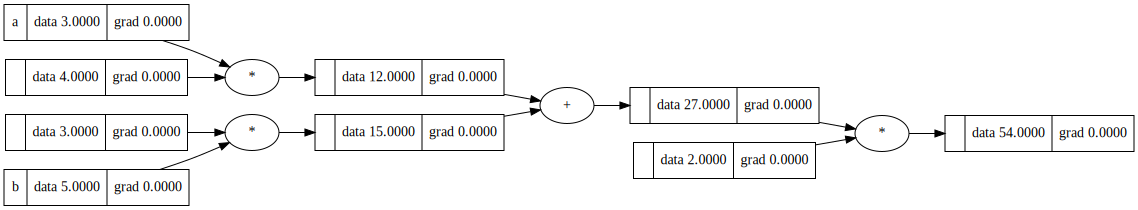

In [161]:
a = Variable(3,label='a')
b = Variable(5,label='b')


c = 4*a + 3*b


L = 2*c 

draw_dot(L)

In [ ]:
# now what we want is to be able to do something like like L.backward() that automatically populates all the grad attributes.

In [169]:
# phase 2
#here's the mind-bending part: Can we compute all these automatically
#implementing Chain rule

class Variable:
  def __init__(self,data,_children = (),_op= '',label = ''):
    self.data = data

    self.grad = 0
    self._op = _op
    self.label = label
    self._children = set(_children)
    # create a placeholder for calling this function
    self._backward = lambda  : None

  def __repr__(self):
    return f"Variable({self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Variable) else Variable(other)
    # remember we go right to left, when we have intermediate computation
    # out = a+b,(out.grad is already populated with dl/dc) and after each operation we want a.grad and b.grad populated.
    # to automatically populate
    out = Variable(self.data + other.data, (self, other), '+')
    #local comp(remember to do these things when out.grad is available/populated..aka recursion)
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Variable) else Variable(other)
    out = Variable(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out

  def __radd__(self,other):
    return self + other

  def __rmul__(self,other):
    return self*other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  # exercise: go through power implementation
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Variable(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out






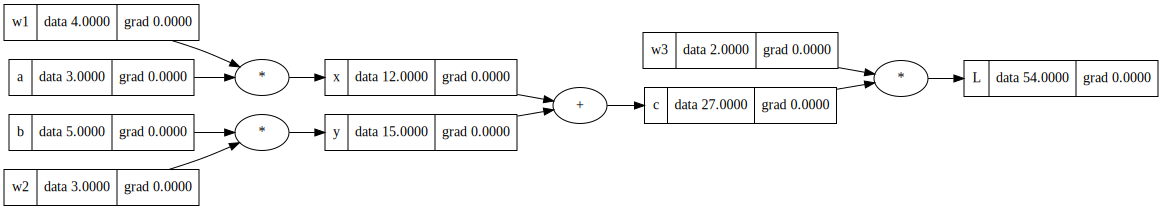

In [170]:
a = Variable(3,label='a')
b = Variable(5,label='b')

w1 = Variable(4,label='w1')
w2 = Variable(3,label='w2')
w3 = Variable(2,label='w3')


x = w1*a; x.label = 'x'
y = w2*b; y.label = 'y'

c = x + y; c.label = 'c'


L = c*w3; L.label = 'L'

draw_dot(L)






In [171]:
#a.grad = 8


L.grad = 1
L._backward()


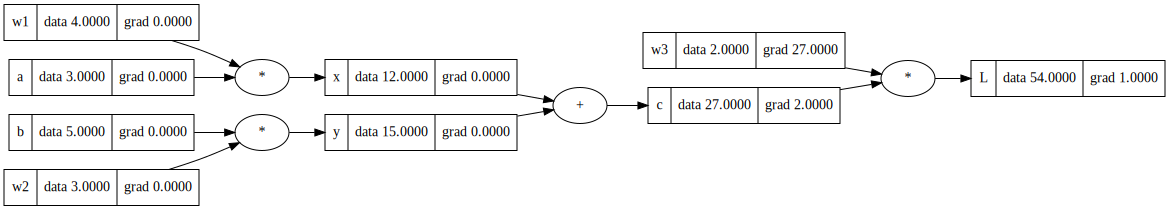

In [172]:
draw_dot(L)


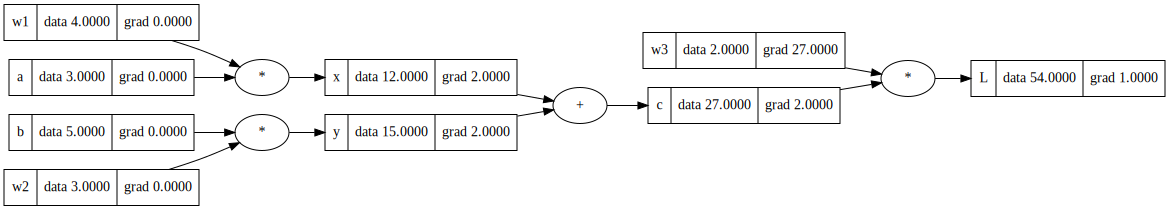

In [173]:
c._backward()
draw_dot(L)

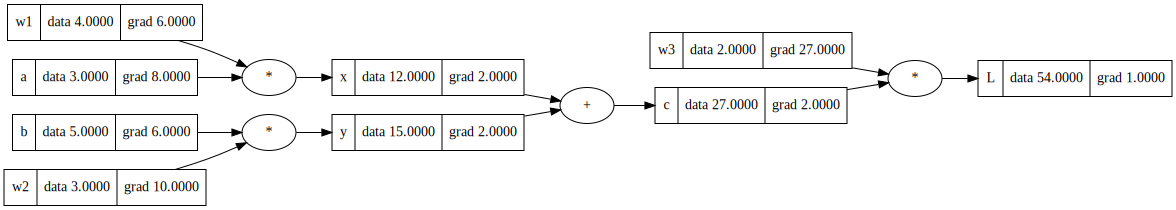

In [174]:
x._backward()
y._backward()
draw_dot(L)

In [175]:
#
a.grad

8.0

In [176]:
# now this ordering = ensuring that a node is called only after all it's future dependencies is called = reverse topological ordering

In [181]:
# phase 2
#here's the mind-bending part: Can we compute all these automatically
#implementing Chain rule

class Variable:
  def __init__(self,data,_children = (),_op= '',label = ''):
    self.data = data

    self.grad = 0
    self._op = _op
    self.label = label
    self._children = set(_children)
    # create a placeholder for calling this function
    self._backward = lambda  : None

  def __repr__(self):
    return f"Variable({self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Variable) else Variable(other)
    # remember we go right to left, when we have intermediate computation
    # out = a+b,(out.grad is already populated with dl/dc) and after each operation we want a.grad and b.grad populated.
    # to automatically populate
    out = Variable(self.data + other.data, (self, other), '+')
    #local comp(remember to do these things when out.grad is available/populated..aka recursion)
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Variable) else Variable(other)
    out = Variable(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out

  def __radd__(self,other):
    return self + other

  def __rmul__(self,other):
    return self*other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  # exercise: go through power implementation
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Variable(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._children:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()






In [182]:
a = Variable(3,label='a')
b = Variable(5,label='b')

w1 = Variable(4,label='w1')
w2 = Variable(3,label='w2')
w3 = Variable(2,label='w3')


x = w1*a; x.label = 'x'
y = w2*b; y.label = 'y'

c = x + y; c.label = 'c'


L = c*w3; L.label = 'L'

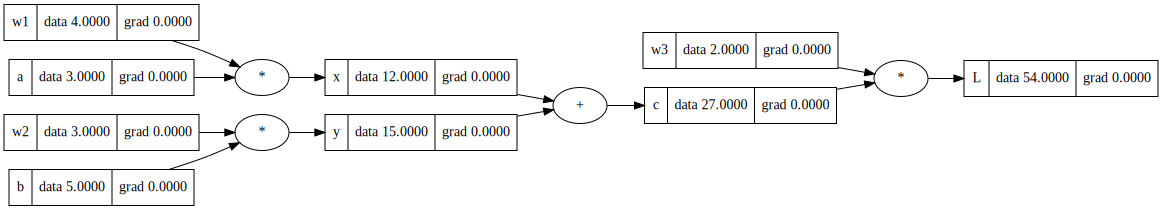

In [183]:
draw_dot(L)

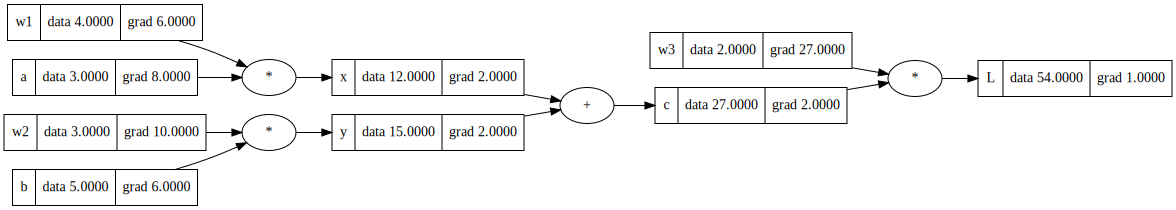

In [184]:
L.backward()
draw_dot(L)

## Outro

If you are wondering why is this useful:

In neural networks(machine learning in general) `L` is called the `loss-function` a metric that we want to reduce on the `training data`(a,b,c) while nudging the `weights`(w1,w2,w3) in the right direction(`gradient direction`).

Note: In python everything is a class. When you do a + b between two intergers it's internally calling __add__ function implemented inside an `integer` class. In this case a + b translates to `self.__add__(b)`.

1. Why its better to use cross-entropy than implement our own loss ?

ans: 
 - pytorch can internally fuse the operations thus more efficient. Also we are creating more intermediate memory(nodes) that are unnecssary

- numerically stable (as softmax is same even if we add arbitrary number to each of the values). Thus pytorch internally subtracts the max-value.

2. Why mini-batch gd is a good idea ?

- doing more steps of approx gradient is better than doing accurate lower # steps.

